<a href="https://colab.research.google.com/github/kkorolev1/machine-learning-1/blob/master/hw/practice-02/homework_practice_02_linregr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [3]:
#!pip install folium

In [4]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train = pd.read_csv('drive/MyDrive/nyc-taxi-trip-duration/train.csv')

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [9]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [10]:
df_train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
df_train = df_train.drop('dropoff_datetime', axis=1)

In [12]:
df_train['pickup_datetime'] = pd.to_datetime(df_train.pickup_datetime)

In [13]:
df_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Проверим пропуски в данных

In [14]:
df_train.isna().sum(axis=0)

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

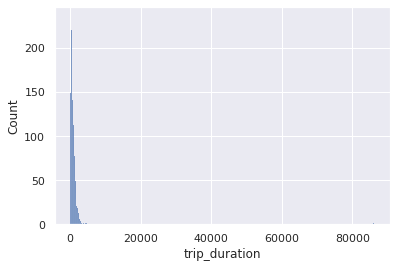

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

sns.histplot(df_train['trip_duration'].sample(2000));

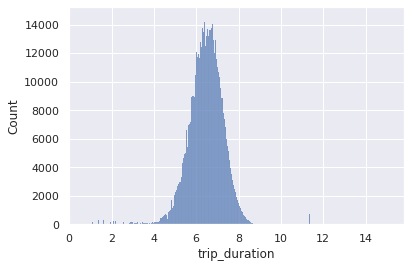

In [16]:
sns.histplot(np.log1p(df_train['trip_duration']));

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Видим, что большинство поездок длились определенное время, но есть тяжелые хвосты - очень продолжительные поездки, вероятно, выбросы. А значение таргетов неотрицательные, можем брать логафрим.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Видимо, в этой задаче нам важен порядок ошибки, и мы не хотим сильно штрафовать за большие разбросы.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 

Запишем MSE для модели $\hat{a}(x_i)$, которая обучалась на логарифмах таргетов. Тогда если взять $a(x_i) = \exp(\hat{a}(x_i)) - 1$ и выразить $\hat{a}(x_i)$, то получим выражение слева от равенства.

$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}=\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

И знаем, что оптимизация RMSE эквивалентна оптимизации MSE, так как неважно минимизировать саму величину или ее квадрат.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

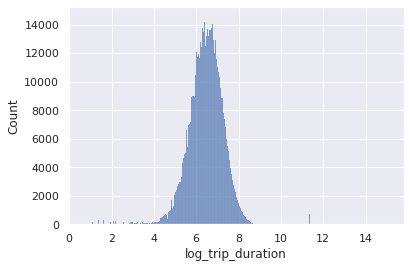

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'])

sns.histplot(df_train['log_trip_duration']);

Колонку trip_duration пока не удаляем, она понадобится для экспериментов дальше.

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_error as mse


mse(df_train['log_trip_duration'], np.full((df_train.shape[0], 1), df_train['log_trip_duration'].mean()), squared=False)

0.7957592365411509

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [19]:
df_train['pickup_datetime'].dt.date.min(), df_train['pickup_datetime'].dt.date.max() 

(datetime.date(2016, 1, 1), datetime.date(2016, 6, 30))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


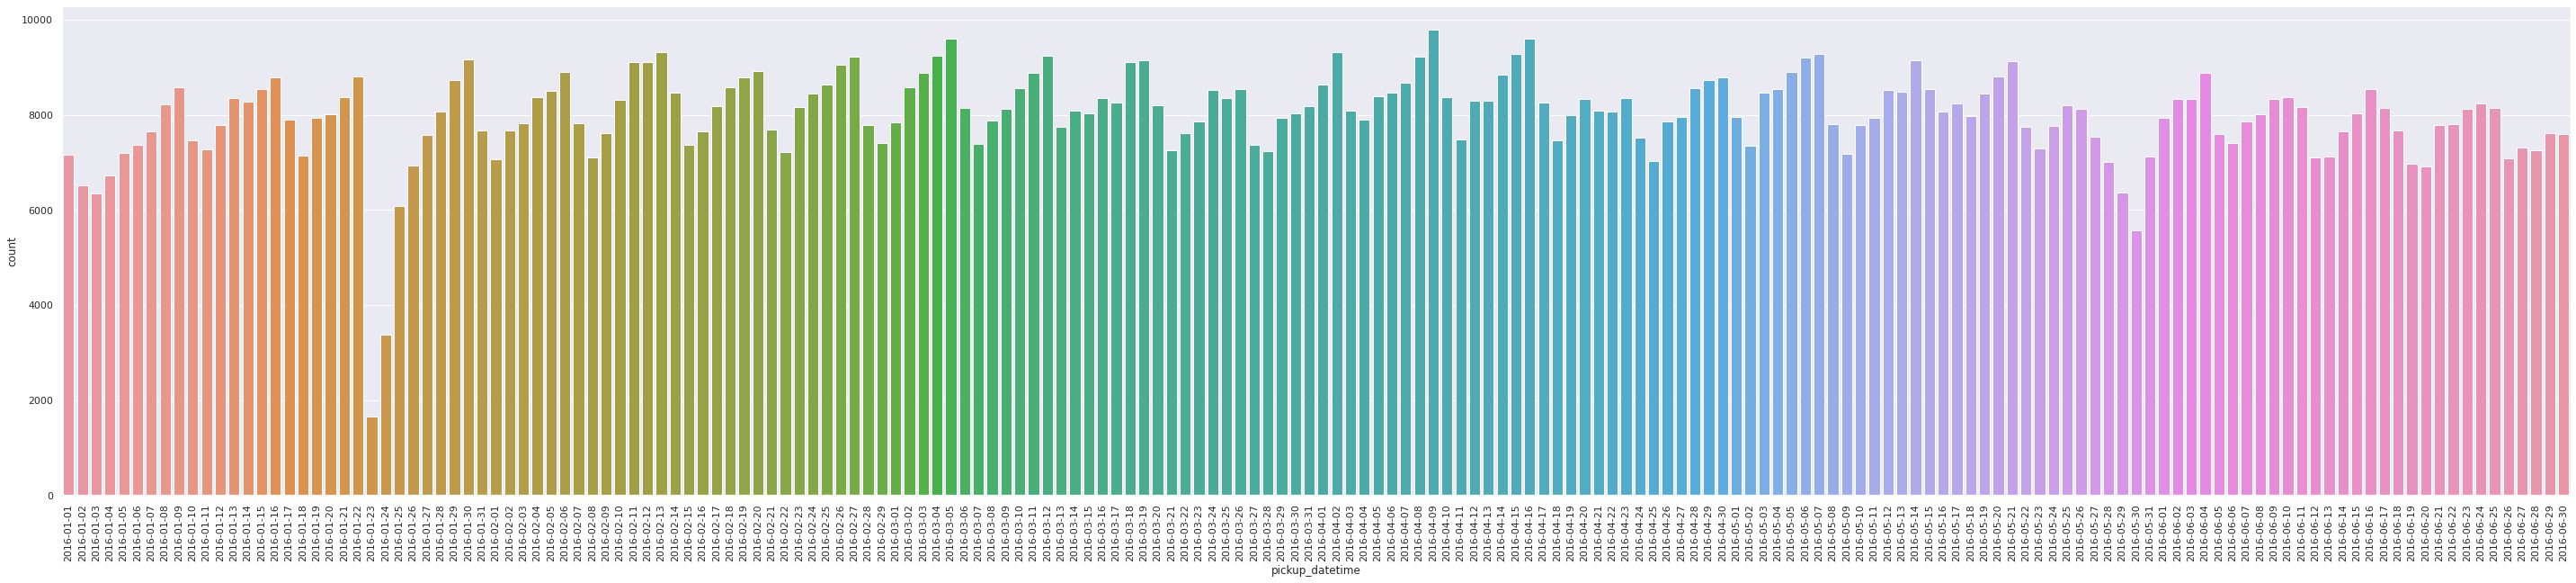

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig = plt.figure()
sorted_dates = df_train['pickup_datetime'].dt.date.sort_values()
ax = sns.countplot(sorted_dates)
ax.set_xticklabels(sorted_dates.unique(), rotation=90)
fig.set_size_inches((50, 10))

NYC under travel ban from deadly East Coast snowstorm

https://www.usatoday.com/story/weather/2016/01/23/blizzard-continues-slam-east-coast/79217258/

А в мае праздник какой-то + жара.

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


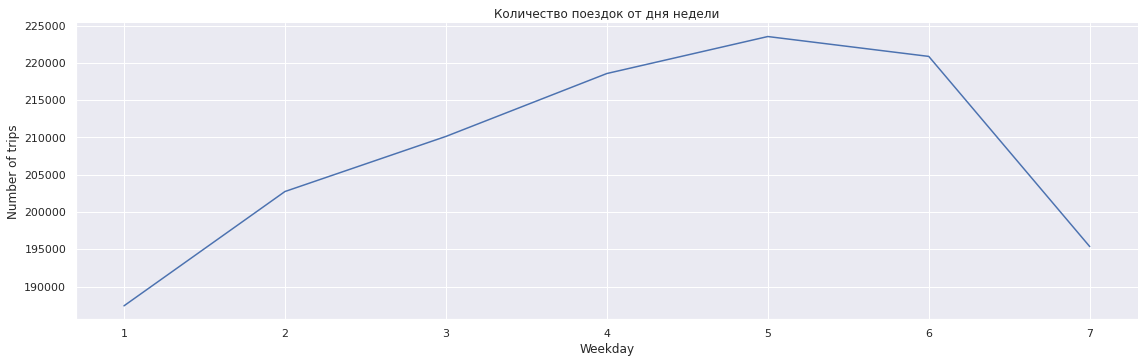

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
weekdays_data = df_train['pickup_datetime'].dt.weekday.value_counts().sort_index()
ax = sns.relplot(weekdays_data.index + 1, weekdays_data, kind='line')
ax.set(xlabel='Weekday', ylabel='Number of trips', title='Количество поездок от дня недели')
ax.figure.set_size_inches(20, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


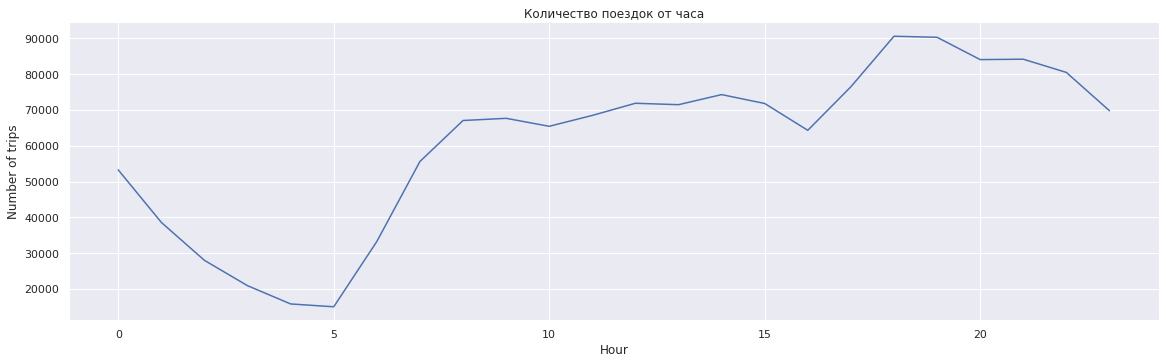

In [22]:
hours_data = df_train['pickup_datetime'].dt.hour.value_counts().sort_index()
ax = sns.relplot(hours_data.index, hours_data, kind='line')
ax.set(xlabel='Hour', ylabel='Number of trips', title='Количество поездок от часа')
ax.figure.set_size_inches(20, 5)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Добавим удобные признаки

In [23]:
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_weekday'] = df_train['pickup_datetime'].dt.weekday + 1
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_train['pickup_day'] = (df_train['pickup_datetime'].dt.date - df_train['pickup_datetime'].dt.date.min()).dt.days

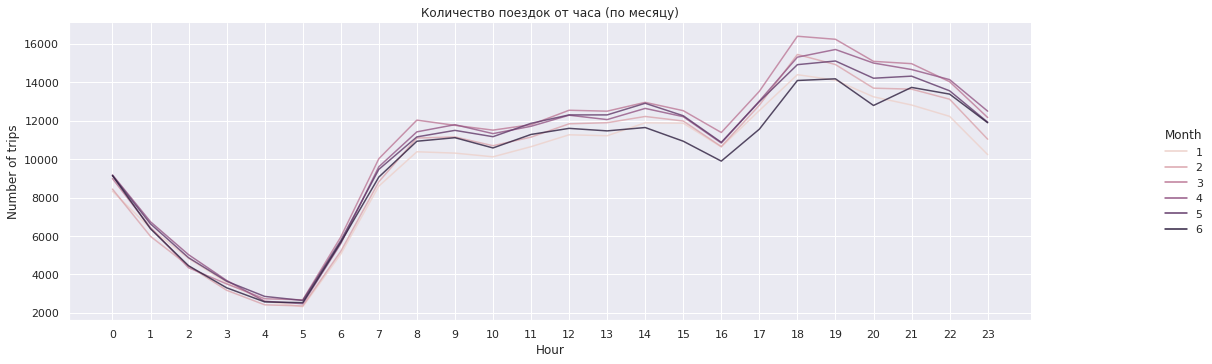

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
hours_months_df = df_train.groupby(['pickup_hour', 'pickup_month']).agg({'pickup_hour': 'count'}).rename(columns={'pickup_hour': 'counts'}).reset_index().rename(columns={'pickup_month': 'Month'})
ax = sns.relplot(data=hours_months_df, x='pickup_hour', y='counts', hue='Month', kind='line', alpha=0.8)
ax.set(xticks=range(24), xlabel='Hour', ylabel='Number of trips', title='Количество поездок от часа (по месяцу)')
ax.figure.set_size_inches(20, 5)

Видим, что по месяцам распределение примерно одинаковое. Наблюдается довольно логичная картина. К полночи люди возращаются с работы или из увеселительных заведений и количество поездок уменьшается до 5 утра. Далее просыпаются, едут на работу, учебу. Днем наблюдается определенное плато, а под вечер поездки учащаются. Кажется, что зимой больше поездок, чем летом, например, из-за холода.

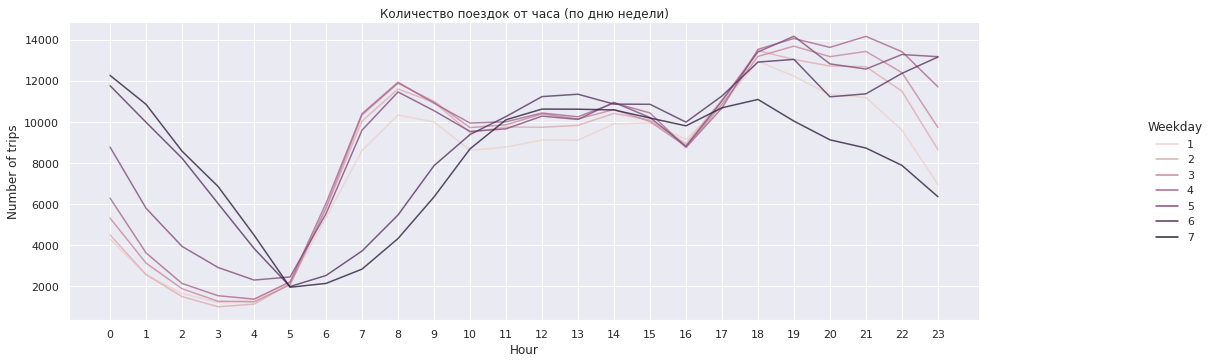

In [25]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
hours_weeks_df = df_train.groupby(['pickup_hour', 'pickup_weekday']).agg({'pickup_hour': 'count'}).rename(columns={'pickup_hour': 'counts'}).reset_index().rename(columns={'pickup_weekday': 'Weekday'})
ax = sns.relplot(data=hours_weeks_df, x='pickup_hour', y='counts', hue='Weekday', kind='line', alpha=0.8)
ax.set(xticks=range(24), xlabel='Hour', ylabel='Number of trips', title='Количество поездок от часа (по дню недели)')
ax.figure.set_size_inches(20, 5)

В будние дни люди утром едут на работу и учебу, а вечером возвращаются., соответственно, в выходные количество поездок в эти периоды меньше. Однако, в выходные ночью люди едут в бары, клубы, отдыхают в общем.

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_train, train_size=0.7, random_state=42)

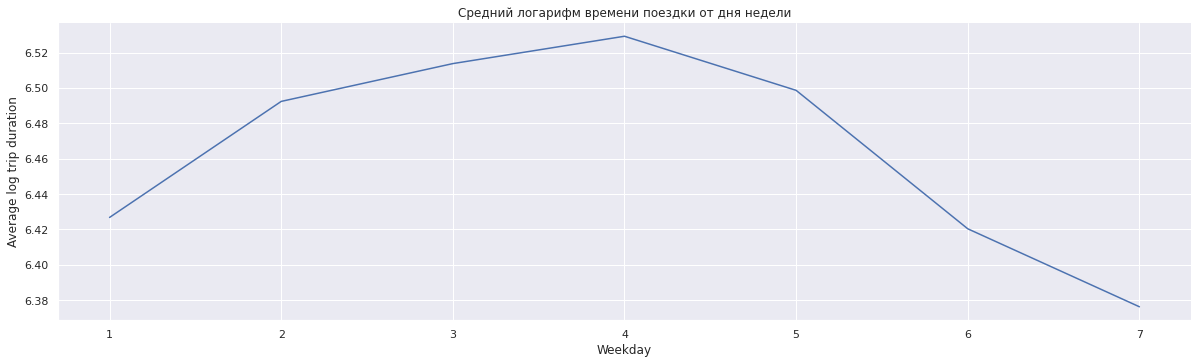

In [27]:
weekday_trip_duration_df = X_train[['pickup_weekday', 'log_trip_duration']].groupby('pickup_weekday').agg({'log_trip_duration': 'mean'}).reset_index()
ax = sns.relplot(data=weekday_trip_duration_df, x='pickup_weekday', y='log_trip_duration', kind='line')
ax.set(xticks=range(1, 8), xlabel='Weekday', ylabel='Average log trip duration', title='Средний логарифм времени поездки от дня недели')
ax.figure.set_size_inches(20, 5)

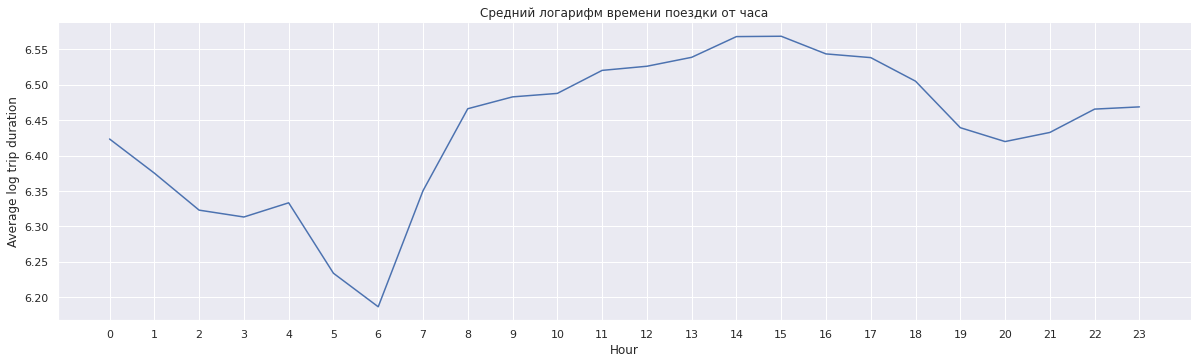

In [28]:
hour_trip_duration_df = X_train[['pickup_hour', 'log_trip_duration']].groupby('pickup_hour').agg({'log_trip_duration': 'mean'}).reset_index()
ax = sns.relplot(data=hour_trip_duration_df, x='pickup_hour', y='log_trip_duration', kind='line')
ax.set(xticks=range(24), xlabel='Hour', ylabel='Average log trip duration', title='Средний логарифм времени поездки от часа')
ax.figure.set_size_inches(20, 5)

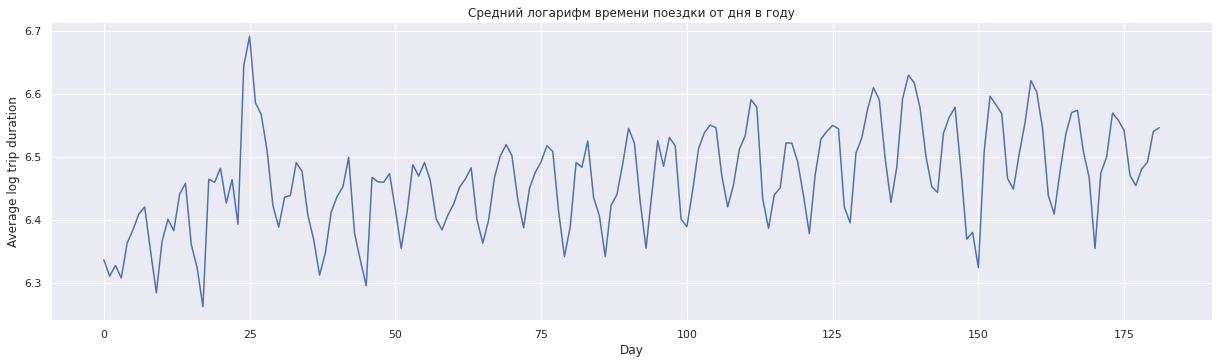

In [29]:
day_trip_duration_df = X_train[['pickup_day', 'log_trip_duration']].groupby('pickup_day').agg({'log_trip_duration': 'mean'}).reset_index()
ax = sns.relplot(data=day_trip_duration_df, x='pickup_day', y='log_trip_duration', kind='line')
ax.set(xlabel='Day', ylabel='Average log trip duration', title='Средний логарифм времени поездки от дня в году')
ax.figure.set_size_inches(20, 5)

Графики похожи для часа в сутках и дня недели.
Объяснить почему графики для количества поездок и времени поездки имеют схожие тренды можно через пробки, чем больше людей заказывают такси, тем больше поток машин на дорогах и увеличивается время поездки. В январе из-за снегопада машины стояли в пробках, дороги были завалены снегом, в общем, увеличилось время поездки. В мае таргет просел, возможно из-за мемориального дня. Скорее всего перекрыли дороги или был выходной, и количество дальних поездок снизился. Тренд на графике зависимости log_trip_duration от номера дня в года заключается в некоторой цикличности, которая зависит от дня недели.

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Все признаки, кроме аномальности у нас уже есть, добавим его.

In [30]:
from datetime import datetime

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def create_anomaly_features(df):
  mask = df['pickup_datetime'].dt.date.isin([datetime.strptime('2016-01-23', '%Y-%m-%d').date(), datetime.strptime('2016-01-24', '%Y-%m-%d').date(), datetime.strptime('2016-01-25', '%Y-%m-%d').date()])
  df.loc[mask, 'is_anomaly_1'] = 1
  df.loc[~mask, 'is_anomaly_1'] = 0

  mask = df['pickup_datetime'].dt.date.isin([datetime.strptime('2016-05-29', '%Y-%m-%d').date(), datetime.strptime('2016-05-30', '%Y-%m-%d').date()])
  df.loc[mask, 'is_anomaly_2'] = 1
  df.loc[~mask, 'is_anomaly_2'] = 0

create_anomaly_features(X_train)
create_anomaly_features(X_test)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

Кажется, они все подходят под категориальные. Потому что непонятно, как интерпретировать численные значение дня недели или часа в сутках. Если бы у нас была чистая линейная зависимость, то мы могли бы весом контролировать численное значение. Но если зависимость более сложная, то в модель 23 часа вечера будет давать больший вклад, чем 1 час ночи при одинаковом весе, что довольно странно. То есть не учитывается цикличность данных. Такие же рассуждения можно провести для признаков, у которых значения идут с некоторой периодичностью, условно по некоторому модулю.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [32]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [33]:
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2']
numeric_features = []

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, X_train['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.7871


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [34]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [35]:
show_circles_on_map(X_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [36]:
show_circles_on_map(X_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

Видимо JFK Airport и Аэропорт Ла-Гуардия

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
  
X_train['haversine'] = haversine_array(X_train['pickup_latitude'].values, X_train['pickup_longitude'].values, X_train['dropoff_latitude'].values, X_train['dropoff_longitude'].values)
X_test['haversine'] = haversine_array(X_test['pickup_latitude'].values, X_test['pickup_longitude'].values, X_test['dropoff_latitude'].values, X_test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['log_haversine'] = np.log1p(X_train['haversine'])
X_test['log_haversine'] = np.log1p(X_test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

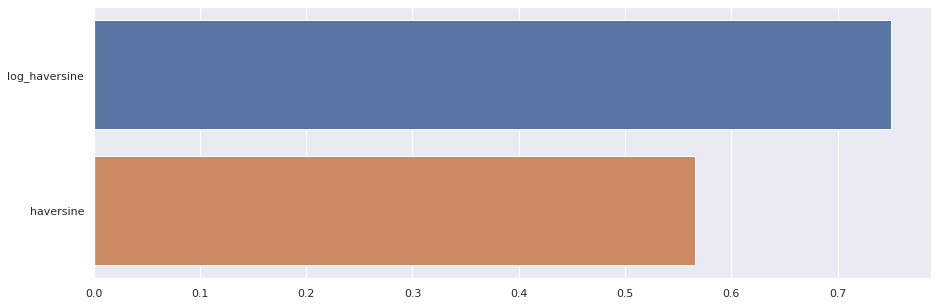

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
correlations = X_train[['haversine', 'log_haversine']].corrwith(X_train['log_trip_duration']).sort_values(ascending=False)
ax = sns.barplot(y=correlations.index, x=correlations)
ax.figure.set_size_inches(15, 5)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [40]:
X_train['avg_velocity'] = X_train['haversine'] / X_train['trip_duration']

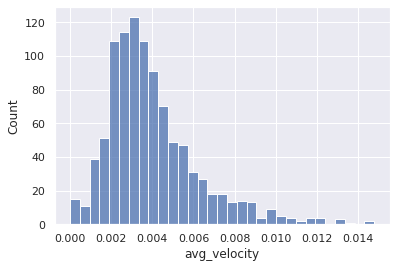

In [41]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Раскоментить потом
sns.histplot(X_train['avg_velocity'].sample(1000))

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [42]:
avg_vel_quantile = np.quantile(X_train['avg_velocity'], 0.95)
avg_vel_quantile

0.008182771621011197

In [43]:
X_train['avg_velocity'].mean(), X_train['avg_velocity'].median()

(0.00400969190538828, 0.0035555173535246377)

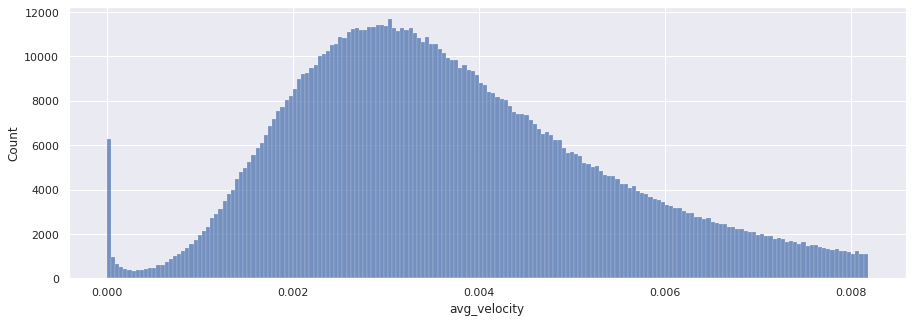

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
ax = sns.histplot(X_train.loc[X_train['avg_velocity'] < avg_vel_quantile, 'avg_velocity'])
ax.figure.set_size_inches(15, 5)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

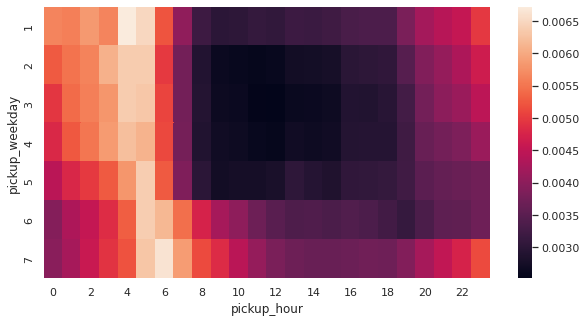

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = X_train.groupby(['pickup_weekday', 'pickup_hour']).agg({'avg_velocity': 'median'}).reset_index()
ax = sns.heatmap(data.pivot('pickup_weekday', 'pickup_hour', 'avg_velocity'))
ax.figure.set_size_inches(10, 5)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [46]:
X_train = X_train.drop('avg_velocity', axis=1)

Времени у нас не будет, чтобы найти скорость. Мы его и пытаемся предсказать.

Минимальная скорость в полдень в середине недели. Максимальная рано утром.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def create_is_traffic_feature(df):
  mask = (df['pickup_hour'] >= 8) & (df['pickup_hour'] <= 17) & (df['pickup_weekday'] >= 2) & (df['pickup_weekday'] <= 5)
  df.loc[mask, 'is_traffic'] = 1
  df.loc[~mask, 'is_traffic'] = 0


def create_is_free_feature(df):
  mask = (df['pickup_hour'] >= 4) & (df['pickup_hour'] <= 5) & (df['pickup_weekday'] >= 1) & (df['pickup_weekday'] <= 5)
  mask2 = (df['pickup_hour'] >= 5) & (df['pickup_hour'] <= 6) & (df['pickup_weekday'] >= 6) & (df['pickup_weekday'] <= 7)
  mask = mask | mask2
  df.loc[mask, 'is_free'] = 1
  df.loc[~mask, 'is_free'] = 0

create_is_traffic_feature(X_train)
create_is_traffic_feature(X_test)

create_is_free_feature(X_train)
create_is_free_feature(X_test)

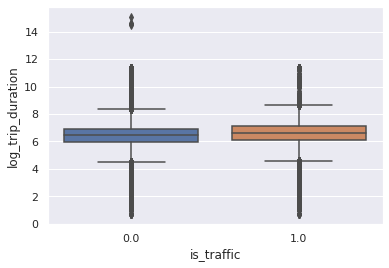

In [48]:
sns.boxplot(data=X_train, x='is_traffic', y='log_trip_duration');

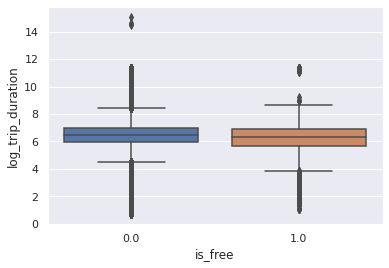

In [49]:
sns.boxplot(data=X_train, x='is_free', y='log_trip_duration')

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

Поездки, которые начинались в районе аэропорта Кеннеди.

In [50]:
jfk_coords = (40.650143, -73.784651)
jfk_radius = 0.02
m = show_circles_on_map(X_train[(np.abs(X_train["pickup_latitude"] - jfk_coords[0]) < jfk_radius) & (np.abs(X_train["pickup_longitude"] - jfk_coords[1]) < jfk_radius)].sample(1000), "pickup_latitude", "pickup_longitude", "blue")
m.fit_bounds(m.get_bounds(), padding=(50, 50))
m

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def create_is_around_point_feature(df, origin, radius, latitude_column, longitude_column, new_column):
    mask = (np.abs(df[latitude_column] - origin[0]) < radius) & (np.abs(df[longitude_column] - origin[1]) < radius)
    df.loc[mask, new_column] = 1
    df.loc[~mask, new_column] = 0

In [52]:
create_is_around_point_feature(X_train, jfk_coords, jfk_radius, 'pickup_latitude', 'pickup_longitude', 'pickup_is_jfk')
create_is_around_point_feature(X_train, jfk_coords, jfk_radius, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_is_jfk')

create_is_around_point_feature(X_test, jfk_coords, jfk_radius, 'pickup_latitude', 'pickup_longitude', 'pickup_is_jfk')
create_is_around_point_feature(X_test, jfk_coords, jfk_radius, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_is_jfk')

Теперь посмотрим на точки из LaGuardia Airport.

In [53]:
laguardia_coords = (40.776693, -73.873572)
laguardia_radius = 0.01
m = show_circles_on_map(X_train[(np.abs(X_train["pickup_latitude"] - laguardia_coords[0]) < laguardia_radius) & (np.abs(X_train["pickup_longitude"] - laguardia_coords[1]) < laguardia_radius)].sample(1000), "pickup_latitude", "pickup_longitude", "blue")
m.fit_bounds(m.get_bounds(), padding=(50, 50))
m

In [54]:
create_is_around_point_feature(X_train, laguardia_coords, laguardia_radius, 'pickup_latitude', 'pickup_longitude', 'pickup_is_laguardia')
create_is_around_point_feature(X_train, laguardia_coords, laguardia_radius, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_is_laguardia')

create_is_around_point_feature(X_test, laguardia_coords, laguardia_radius, 'pickup_latitude', 'pickup_longitude', 'pickup_is_laguardia')
create_is_around_point_feature(X_test, laguardia_coords, laguardia_radius, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_is_laguardia')

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

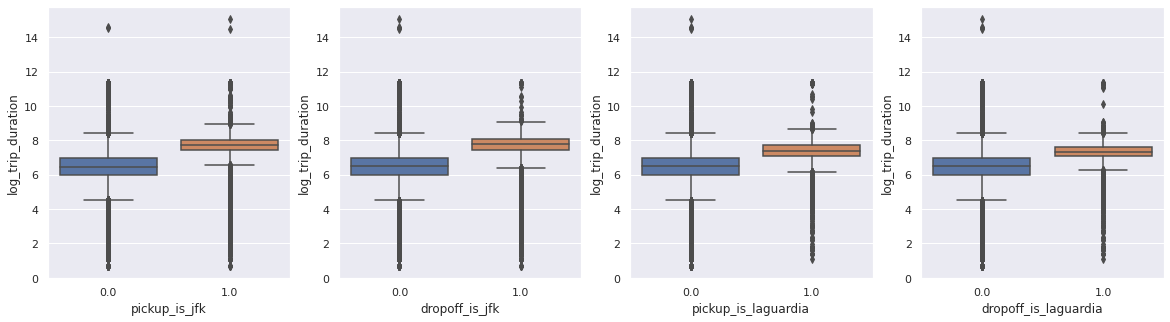

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(1, 4)
sns.boxplot(data=X_train, x='pickup_is_jfk', y='log_trip_duration', ax=axes[0])
sns.boxplot(data=X_train, x='dropoff_is_jfk', y='log_trip_duration', ax=axes[1])
sns.boxplot(data=X_train, x='pickup_is_laguardia', y='log_trip_duration', ax=axes[2])
sns.boxplot(data=X_train, x='dropoff_is_laguardia', y='log_trip_duration', ax=axes[3])
fig.set_size_inches(20, 5)

Распределение для посадки и высадки примерно одинаковое для обоих аэропортов, что хорошо. Однако, довольно много выбросов. Вряд ли эти признаки дадут весомый вклад, скорее будем переобучаться на них. Поездки из или в аэропорт не сильно отличаются по статистикам от других поездок.

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

Напишем вспомогательные функции

In [56]:
def show_circles_on_map_with_bounds(data, points, latitude_column, longitude_column, color):
    """
    Выводит точки вместе с нарезанными зонами
    """
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for point in points:
        folium.Rectangle([point[0], point[1]], fill_color="red", fill_opacity=0.6).add_to(m)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

def is_point_in_square(x, y, bl, tr):
    """
    Векторизированно проверяет, что точки лежат в прямоугольнике
    """
    return (x < tr[0]) & (y < tr[1]) & (x > bl[0]) & (y > bl[1])

def bounds_points(bl, tr, x_num_squares, y_num_squares):
    """
    Нарезает прямоугольник, заданный bl и tr, в количестве
    x_num_squares * y_num_squares и возвращает список с координатами прямоугольников
    """
    rec_h = (tr[0] - bl[0]) / x_num_squares
    rec_w = (tr[1] - bl[1]) / y_num_squares
    origin = tr
    points = []

    for dx in range(1, x_num_squares + 1):
        for dy in range(1, y_num_squares + 1):
            x1 = origin[0] - rec_h * dx
            y1 = origin[1] - rec_w * dy
            x2 = origin[0] - rec_h * (dx - 1)
            y2 = origin[1] - rec_w * (dy - 1)
            points.append(((x1, y1), (x2, y2)))

    return points

Нарисуем прямоугольник, разбитый по областям.

In [349]:
# Нашли координаты прямоугольника экспериментально
bottom_left = (40.70676259495365, -74.01981135236582)
top_right = (40.796345214160446, -73.938309426549)

points_mask = is_point_in_square(X_train['pickup_latitude'], X_train['pickup_longitude'], bottom_left, top_right)
points = bounds_points(bottom_left, top_right, 4, 3)
m = show_circles_on_map_with_bounds(X_train[points_mask].sample(1000), points, "pickup_latitude", "pickup_longitude", "blue")
m.fit_bounds(m.get_bounds(), padding=(10, 10))
m

Напишем транформер, который определяет, в какую зону попадает каждая точка.

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, points):
        # your code here
        self.points = points
    
    def show_map(self, data, latitude_column, longitude_column, loc_num_column):
        # you may want to visualize cells
        location = (data[latitude_column].mean(), data[longitude_column].mean())
        m = folium.Map(location=location)

        for point in self.points:
            folium.Rectangle([point[0], point[1]], fill_color="red", fill_opacity=0.3).add_to(m)

        colors = ['red', 'blue', 'gray', 'darkred', 'lightred', 'orange', 'beige', 'green', 'darkgreen', 'lightgreen', 'darkblue', 'lightblue','purple']

        for _, row in data.iterrows():
            folium.Circle(
                radius=100,
                location=(row[latitude_column], row[longitude_column]),
                color=colors[row[loc_num_column] + 1],
                fill_color=colors[row[loc_num_column] + 1],
                fill=True
            ).add_to(m)

        return m
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        X_tr = X.copy()

        X_tr['pickup_loc_num'] = -1
        X_tr['dropoff_loc_num'] = -1

        for i, point in enumerate(self.points):
          mask = is_point_in_square(X_tr['pickup_latitude'], X_tr['pickup_longitude'], point[0], point[1])
          X_tr.loc[mask, 'pickup_loc_num'] = i

          mask = is_point_in_square(X_tr['dropoff_latitude'], X_tr['dropoff_longitude'], point[0], point[1])
          X_tr.loc[mask, 'dropoff_loc_num'] = i

        return X_tr

In [59]:
map_grid_transformer = MapGridTransformer(points)
X_train = map_grid_transformer.transform(X_train)
X_test = map_grid_transformer.transform(X_test)

Раскрасим точки для областей разными цветами, чтобы убедиться, что транформер работает

In [60]:
m = map_grid_transformer.show_map(X_train.sample(1000), "pickup_latitude", "pickup_longitude", "pickup_loc_num")
m.fit_bounds(m.get_bounds(), padding=(50, 50))
m

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [61]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, X_train['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4739


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [62]:
X_train['vendor_id'].value_counts()

2    546566
1    474484
Name: vendor_id, dtype: int64

In [63]:
X_train['passenger_count'].value_counts()

1    723614
2    147429
5     54532
3     41919
6     33707
4     19804
0        41
7         2
8         1
9         1
Name: passenger_count, dtype: int64

In [64]:
X_train['store_and_fwd_flag'].value_counts()

N    1015403
Y       5647
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

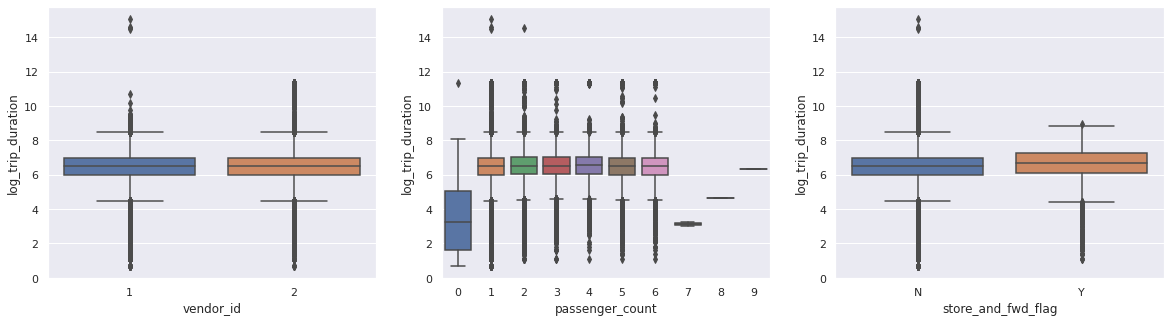

In [65]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(1, 3)
sns.boxplot(data=X_train, x='vendor_id', y='log_trip_duration', ax=axes[0])
sns.boxplot(data=X_train, x='passenger_count', y='log_trip_duration', ax=axes[1])
sns.boxplot(data=X_train, x='store_and_fwd_flag', y='log_trip_duration', ax=axes[2])
fig.set_size_inches(20, 5)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [66]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def transform_vendor_id_and_store_and_fwd_flag(df):
  df['vendor_id'] = df['vendor_id'] - 1
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda store_and_fwd_flag: 1 if store_and_fwd_flag == 'Y' else 0)

transform_vendor_id_and_store_and_fwd_flag(X_train)
transform_vendor_id_and_store_and_fwd_flag(X_test)

In [67]:
print(X_train['vendor_id'].value_counts())
print(X_train['store_and_fwd_flag'].value_counts())

1    546566
0    474484
Name: vendor_id, dtype: int64
0    1015403
1       5647
Name: store_and_fwd_flag, dtype: int64


Довольно бесполезные признаки, время поездки особо не меняется при разных значениях. Есть некоторые интересности у passenger_count, например, поездки с 0 пассажиров.

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [68]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, X_train['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4736


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [69]:
X_train = X_train.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Сделаем копию нашей выборки для экспериментов, чтобы не испортить изначальный датасет.

In [70]:
X_train2 = X_train.copy()

In [71]:
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, X_train['log_trip_duration'])

reg_residual = np.abs(model.predict(X_train2) - X_train2.log_trip_duration)

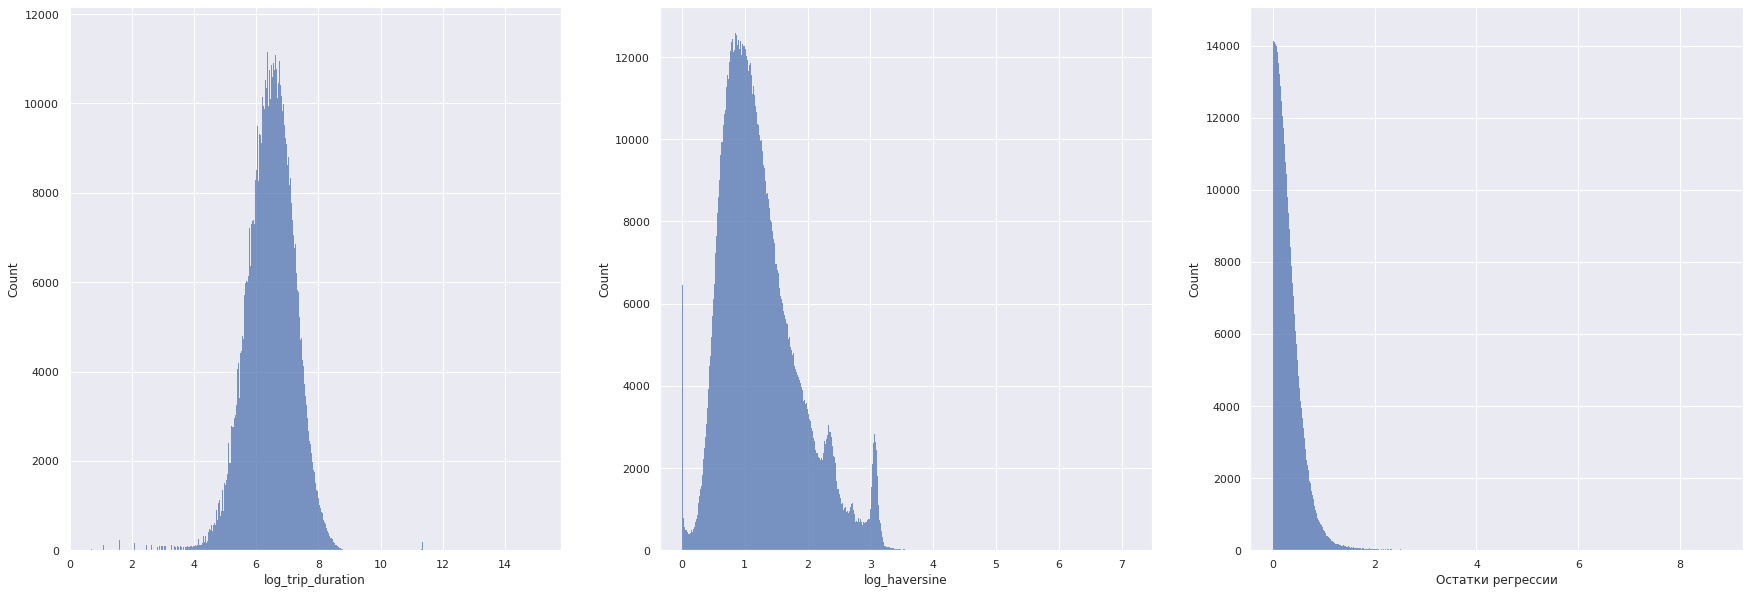

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(1, 3)
sns.histplot(X_train2.log_trip_duration, ax=axes[0])
sns.histplot(X_train2.log_haversine, ax=axes[1])
sns.histplot(reg_residual, ax=axes[2])
axes[2].set(xlabel='Остатки регрессии')
fig.set_size_inches(30, 10)

In [73]:
X_train2 = X_train2[reg_residual < 2]
X_train2 = X_train2[X_train2['log_trip_duration'] > 3]
X_train2 = X_train2[X_train2['log_haversine'] < 3.5]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [74]:
categorical

['pickup_weekday',
 'pickup_month',
 'pickup_hour',
 'pickup_day',
 'is_anomaly_1',
 'is_anomaly_2',
 'is_traffic',
 'is_free',
 'pickup_is_jfk',
 'dropoff_is_jfk',
 'pickup_is_laguardia',
 'dropoff_is_laguardia',
 'pickup_loc_num',
 'dropoff_loc_num']

Кажется, нет смысла объединять бинарные признаки для аномалий или для аэропортов в один, потому что они имеют разные распределения и должны давать разный вклад в целевую переменную.

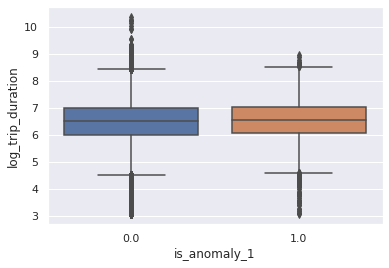

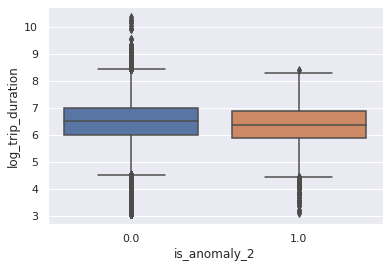

In [75]:
sns.boxplot(x=X_train2['is_anomaly_1'], y=X_train2['log_trip_duration']);
plt.show()
sns.boxplot(x=X_train2['is_anomaly_2'], y=X_train2['log_trip_duration']);

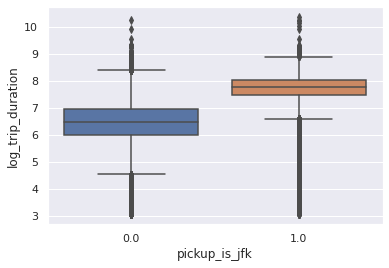

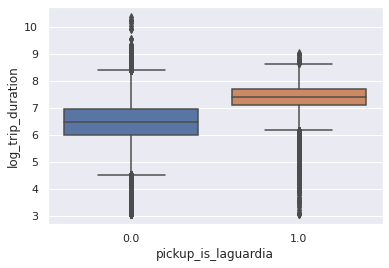

In [76]:
sns.boxplot(x=X_train2['pickup_is_jfk'], y=X_train2['log_trip_duration']);
plt.show()
sns.boxplot(x=X_train2['pickup_is_laguardia'], y=X_train2['log_trip_duration']);

Посмотрим на признаки, связанные с датами.

In [77]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train2['pickup_weekday'].value_counts()

5    155734
6    153613
4    152062
3    146058
2    141406
7    135827
1    130325
Name: pickup_weekday, dtype: int64

In [78]:
X_train2['pickup_month'].value_counts()

3    178608
4    175113
5    172537
2    165702
6    163029
1    160036
Name: pickup_month, dtype: int64

In [79]:
X_train2['pickup_hour'].value_counts()

18    63257
19    63019
21    58661
20    58598
22    56092
17    53329
14    51679
12    50287
15    49725
13    49674
23    48305
11    47546
9     47064
8     46806
10    45437
16    44493
7     38621
0     37335
1     26725
6     23182
2     19551
3     14483
4     10806
5     10350
Name: pickup_hour, dtype: int64

In [80]:
X_train2['pickup_day'].value_counts().sort_values()

22     1143
23     2363
150    3888
24     4260
2      4433
       ... 
98     6479
105    6512
64     6599
106    6731
99     6808
Name: pickup_day, Length: 182, dtype: int64

Видим, что для дат нет особых категорий.

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [81]:
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4742


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [82]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(f"До OneHot-кодирования было {len(categorical + numeric_features)} признаков")

До OneHot-кодирования было 14 признаков


In [83]:
print(f"После OneHot-кодирования стало {column_transformer.transform(X_train2).shape[1]} признаков")

После OneHot-кодирования стало 260 признаков


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [84]:
from sklearn.linear_model import Lasso

In [85]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.7950


Видим, что Ridge значительно лучше.

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [86]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV

In [87]:
alphas = np.logspace(-5, 5, 10)

# 5 батчей, на 4 обучаемся, на 1 валидируемся, как раз 8:2
cv = GridSearchCV(Ridge(), param_grid={"alpha": alphas}, scoring='neg_root_mean_squared_error', cv=5, verbose=3)

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('cv', cv)
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))
print(f"best alpha {cv.best_params_['alpha']}")
print(f"Лучший результат на валидации {-cv.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ......................alpha=1e-05;, score=-0.403 total time=   0.8s
[CV 2/5] END ......................alpha=1e-05;, score=-0.404 total time=   0.9s
[CV 3/5] END ......................alpha=1e-05;, score=-0.403 total time=   0.9s
[CV 4/5] END ......................alpha=1e-05;, score=-0.404 total time=   0.9s
[CV 5/5] END ......................alpha=1e-05;, score=-0.404 total time=   0.9s
[CV 1/5] END ......alpha=0.0001291549665014884;, score=-0.403 total time=   0.9s
[CV 2/5] END ......alpha=0.0001291549665014884;, score=-0.404 total time=   0.9s
[CV 3/5] END ......alpha=0.0001291549665014884;, score=-0.403 total time=   0.9s
[CV 4/5] END ......alpha=0.0001291549665014884;, score=-0.404 total time=   0.9s
[CV 5/5] END ......alpha=0.0001291549665014884;, score=-0.404 total time=   0.9s
[CV 1/5] END ......alpha=0.0016681005372000592;, score=-0.403 total time=   0.9s
[CV 2/5] END ......alpha=0.0016681005372000592;,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


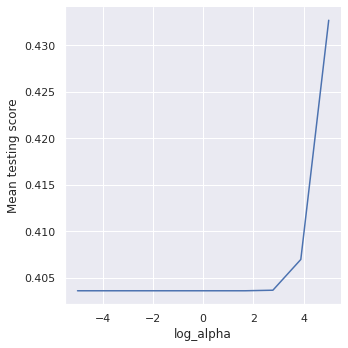

In [88]:
ax = sns.relplot(np.log10(alphas), -cv.cv_results_['mean_test_score'], kind='line')
ax.set(xlabel='log_alpha', ylabel='Mean testing score');

In [89]:
alphas = np.logspace(-3, 5, 10)

# 5 батчей, на 4 обучаемся, на 1 валидируемся, как раз 8:2
cv = GridSearchCV(Lasso(), param_grid={"alpha": alphas}, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=3)

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('cv', cv)
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))
print(f"best alpha {cv.best_params_['alpha']}")
print(f"Лучший результат на train {-cv.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test RMSE = 0.4784
best alpha 0.001
Лучший результат на train 0.40832136036124894


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [90]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

num_zeros_weights = []

for alpha in alphas:
    pipeline = Pipeline(steps=[('transform', column_transformer), ('regression', Lasso(alpha))])
    model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
    num_zeros_weights.append((model[-1].coef_ == 0).sum())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


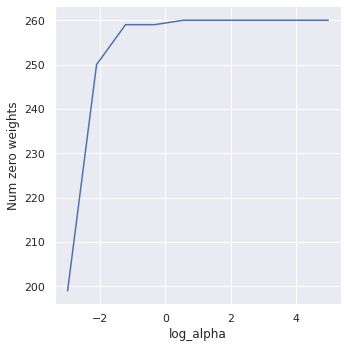

In [91]:
ax = sns.relplot(np.log10(alphas), num_zeros_weights, kind='line')
ax.set(xlabel='log_alpha', ylabel='Num zero weights');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


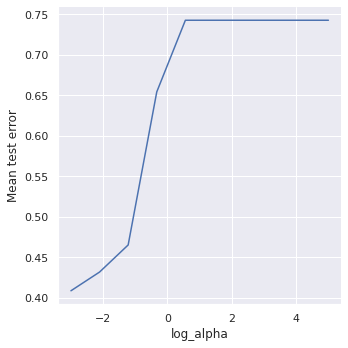

In [92]:
ax = sns.relplot(np.log10(alphas), -cv.cv_results_['mean_test_score'], kind='line')
ax.set(xlabel='log_alpha', ylabel='Mean test error');

Для $\alpha = 10^{-4}$ уже считается больше 15 минут, поэтому ограничился таким отрезком для альф. Видим по графикам, что даже занулив 50 последних весов, ошибка выросла на 0.35. То есть ухудшение довольно сильное.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [93]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
loc_num_pairs = X_train2.groupby(['pickup_loc_num', 'dropoff_loc_num']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100).iloc[:, [0,1]].to_numpy()

In [94]:
def add_loc_pair_index_feature(df):
    df['loc_pair_index'] = -1

    for pair_index, pickup_dropoff_pair in enumerate(loc_num_pairs):
        mask = (df['pickup_loc_num'] == pickup_dropoff_pair[0]) & (df['dropoff_loc_num'] == pickup_dropoff_pair[1])
        df.loc[mask, 'loc_pair_index'] = pair_index

add_loc_pair_index_feature(X_train2)
add_loc_pair_index_feature(X_test)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [95]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num', 'loc_pair_index']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge(46))
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4654


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [96]:
def convert_to_cartesian(lat, lon):
    R = 6371
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    #z = R * np.sin(lat)
    return np.stack((x, y), axis=1)

def get_rot_matrix(alpha):
    return np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])

Нарисуем прямые параллельные улицам.

In [97]:
spher_points = X_train2.sample(100)[['pickup_latitude', 'pickup_longitude']].to_numpy()

In [98]:
spher_line_start = np.array((40.731462, -73.996949))
spher_line_end = np.array((40.803130, -73.944685))


# True orthogonal
#spher_line_start2 = spher_line_start
#spher_line_end2 = spher_line_start2 + (spher_line_end - spher_line_start) @ get_rot_matrix(np.pi / 2).T


spher_line_start2 = np.array((40.771358, -73.993881))
spher_line_end2 = np.array((40.757238, -73.960372))

spher_lines = np.stack((spher_line_start, spher_line_end, spher_line_start2, spher_line_end2), axis=0)

In [99]:
m = show_circles_on_map(X_train2.sample(100), 'pickup_latitude', 'pickup_longitude', 'blue')

folium.PolyLine((spher_lines[0,:], spher_lines[1,:]), color="red", weight=5, opacity=1).add_to(m)
folium.PolyLine((spher_lines[2,:], spher_lines[3,:]), color="green", weight=5, opacity=1).add_to(m)

m.fit_bounds(m.get_bounds(), padding=(50, 50))
m

На карте они практически идеально ортогональны, но как кажется из-за проекции сферы на плоскость у нас поехали углы и расстояния.
Сделаем допущение, что на маленьком участке карты этим можно пренебречь и считать, что мы работаем на обычной плоскости.

In [100]:
vec1 = (spher_line_end - spher_line_start)
vec2 = (spher_line_end2 - spher_line_start2)
np.dot(vec1, vec2)

0.0007393622159996222

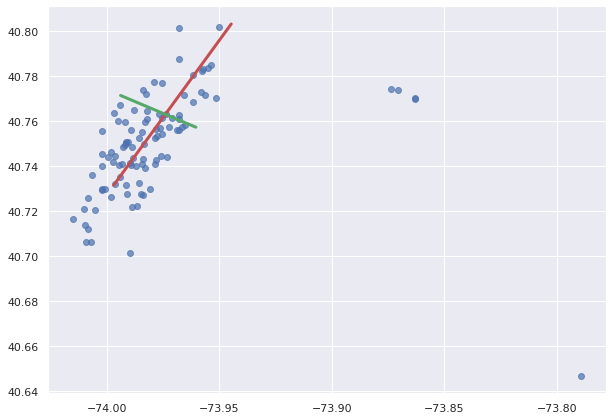

In [101]:
plt.figure(figsize=(10, 10))

#cart_points = convert_to_cartesian(spher_points[:,0], spher_points[:,1])
#plt.scatter(cart_points[:,1], cart_points[:,0], alpha=0.7)

#cart_lines = convert_to_cartesian(spher_lines[:,0], spher_lines[:,1])
#plt.plot(cart_lines[0:2, 1], cart_lines[0:2, 0], color='r')
#plt.plot(cart_lines[2:4, 1], cart_lines[2:4, 0], color='g')

plt.scatter(spher_points[:,1], spher_points[:,0], alpha=0.7)
plt.plot(spher_lines[0:2, 1], spher_lines[0:2, 0], color='r', linewidth=3)
plt.plot(spher_lines[2:4, 1], spher_lines[2:4, 0], color='g', linewidth=3)

plt.gca().set_aspect("equal")
plt.show()

In [102]:
origin = (spher_line_start + spher_line_end) / 2

transf_points = spher_points - origin
transf_lines = spher_lines - origin

Сдвинем в начало координат.

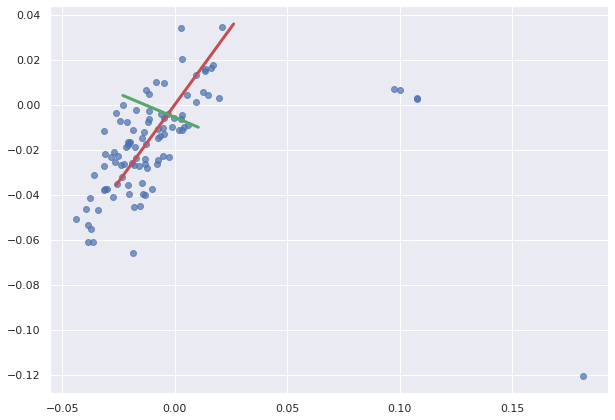

In [103]:
plt.figure(figsize=(10, 10))

plt.scatter(transf_points[:,1], transf_points[:,0], alpha=0.7)
plt.plot(transf_lines[0:2, 1], transf_lines[0:2, 0], color='r', linewidth=3)
plt.plot(transf_lines[2:4, 1], transf_lines[2:4, 0], color='g', linewidth=3)

plt.gca().set_aspect("equal")
plt.show()

Найдем угол между базисным и нашей осью

In [104]:
vec = transf_lines[1,:] - transf_lines[0,:]
st_vec = np.array((1, 0))

angle = np.arccos(np.dot(vec, st_vec) / np.linalg.norm(vec))
angle

0.630089324834029

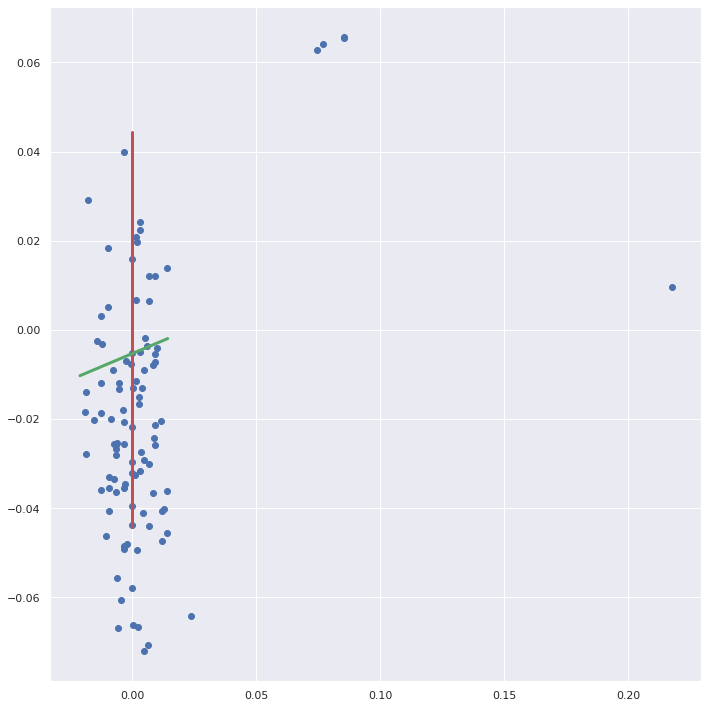

In [105]:
rot_matrix = get_rot_matrix(-angle)

rotated_points = transf_points @ rot_matrix.T
rotated_lines = transf_lines @ rot_matrix.T

plt.figure(figsize=(10, 10))

plt.scatter(rotated_points[:,1], rotated_points[:,0])
plt.plot(rotated_lines[0:2, 1], rotated_lines[0:2, 0], color='r', linewidth=3)
plt.plot(rotated_lines[2:4, 1], rotated_lines[2:4, 0], color='g', linewidth=3)

#plt.gca().set_aspect("equal")
plt.tight_layout()

plt.show()

При преобразованиях углы сохранились

In [106]:
vec1 = (rotated_lines[1,:] - rotated_lines[0,:])
vec2 = (rotated_lines[3,:] - rotated_lines[2,:])
np.dot(vec1, vec2)

0.0007393622159996223

In [107]:
def transform_points(points):
    return (points - origin) @ rot_matrix.T

def manhattan(X1, X2):
    return np.abs(X1 - X2).sum(axis=1)

def create_manhattan_feature(df):
    X1 = df[['pickup_latitude', 'pickup_longitude']].to_numpy()
    X2 = df[['dropoff_latitude', 'dropoff_longitude']].to_numpy()
    return manhattan(transform_points(X1), transform_points(X2))

X_train2['manhattan'] = create_manhattan_feature(X_train2)
X_test['manhattan'] = create_manhattan_feature(X_test)

In [108]:
X_train2['log_manhattan'] = np.log1p(X_train2['manhattan'])
X_test['log_manhattan'] = np.log1p(X_test['manhattan'])

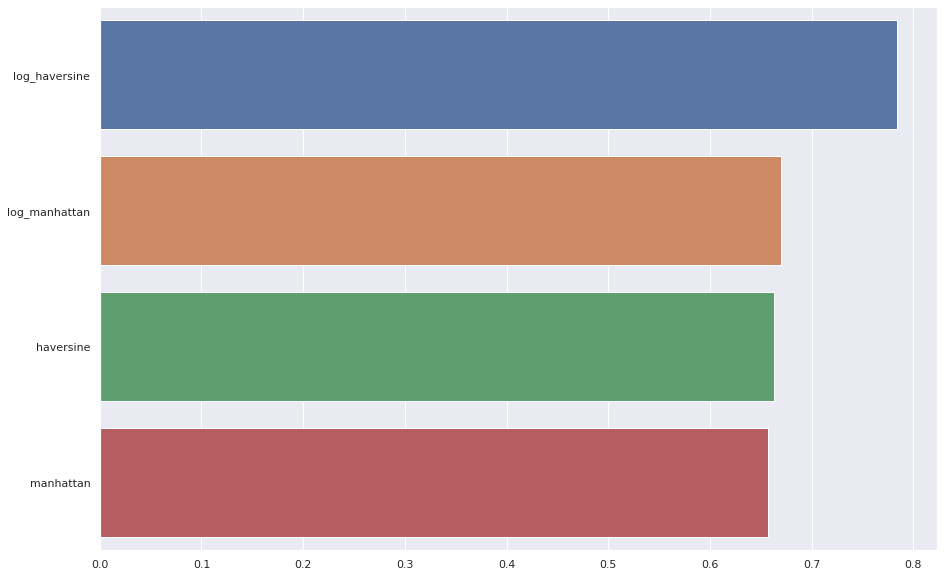

In [109]:
correlations = X_train2[['manhattan', 'log_manhattan', 'haversine', 'log_haversine']].corrwith(X_train2['log_trip_duration']).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [110]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num', 'loc_pair_index']
numeric_features = ['log_haversine', 'log_manhattan']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge(46))
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))


Test RMSE = 0.4639


Стало чуть получше, но большой разницы между manhattan и log_manhattan нет. Корреляция это подтверждает. Наверное, haversine лучше подходит для данной задачи, когда мы находимся в сферических координатах.

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [111]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!pip install h3
!pip install h3pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 2.6 MB/s 
     |████████████████████████████████| 1.0 MB 11.2 MB/s 
     |████████████████████████████████| 16.7 MB 41.9 MB/s 
     |████████████████████████████████| 6.3 MB 49.4 MB/s 
  Created wheel for h3pandas: filename=h3pandas-0.2.3-py3-none-any.whl size=17136 sha256=4e796d9251d86f991ab9a4c8ccf46bcda9acfa250890171f97f39bee4d797824
  Stored in directory: /root/.cache/pip/wheels/59/d8/b5/d5406a801c743e39323e3305611d8caf558077b6caf7e8858f
Successfully built h3pandas


In [173]:
from h3 import h3
import h3pandas
import geopandas

def visualize_hexagons(hexagons, color="red", folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)

        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
        m.add_child(my_PolyLine)
    return m

In [233]:
def multipolygon_to_polygon(gj):
    for feature in gj['features']:
        geometry = feature['geometry']
        geometry['type'] = 'Polygon'
        geometry['coordinates'] = geometry['coordinates'][0]
    return gj

def fix_geojson(old_filename, new_filename):
    gj = None
    with open(old_filename, 'r') as f:
        gj = json.load(f)
    with open(new_filename, 'w') as f:
        f.write(json.dumps(multipolygon_to_polygon(gj)))

#fix_geojson('manhattan.geojson', 'manhattan2.geojson')

Загрузим полигоны Манхэттена в формате geojson и нарисуем их на карте.

In [237]:
import json

MANHATTAN_GEOJSON = 'manhattan2.geojson'
geojson = json.load(open(MANHATTAN_GEOJSON))

In [238]:
m = folium.Map(location=origin, zoom_start=13, tiles='cartodbpositron')

folium.GeoJson(
    geojson,
).add_to(m)

m

In [239]:
gdf = geopandas.read_file(MANHATTAN_GEOJSON)

gdf.head()

cartodb_id               name                 created_at  \
0           9  Battery Park City  2014-03-09T19:11:53+00:00   
1          50       Central Park  2014-03-09T19:11:53+00:00   
2          52            Chelsea  2014-03-09T19:11:53+00:00   
3          54          Chinatown  2014-03-09T19:11:53+00:00   
4          57       Civic Center  2014-03-09T19:11:53+00:00   

                  updated_at  \
0  2014-03-09T19:11:53+00:00   
1  2014-03-09T19:11:53+00:00   
2  2014-03-09T19:11:53+00:00   
3  2014-03-09T19:11:53+00:00   
4  2014-03-09T19:11:53+00:00   

                                            geometry  
0  POLYGON ((-74.01375 40.71369, -74.01426 40.710...  
1  POLYGON ((-73.94966 40.79707, -73.94964 40.796...  
2  POLYGON ((-73.99346 40.75219, -73.98794 40.749...  
3  POLYGON ((-73.99999 40.71798, -73.99864 40.717...  
4  POLYGON ((-73.99799 40.71272, -73.99777 40.711...

In [240]:
gdf.shape

(37, 5)

Нарисуем шестиугольники поверх Манхэттена.

In [241]:
hex_indices = set()

for i in range(gdf.shape[0]):
    hex_indices |= h3.polyfill(gdf.geometry[i].__geo_interface__, res=8, geo_json_conformant = True)

m = visualize_hexagons(hex_indices)
m

In [317]:
"""
def create_hex_feature(df, lat_col, lng_col, feature_name):
    df[feature_name] = df[[lat_col, lng_col]].apply(lambda row: h3.geo_to_h3(row[0], row[1], resolution=8), axis=1)
    return df

create_hex_feature(X_train2, 'pickup_latitude', 'pickup_longitude', 'pickup_hex')
create_hex_feature(X_train2, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_hex')
create_hex_feature(X_test, 'pickup_latitude', 'pickup_longitude', 'pickup_hex')
create_hex_feature(X_test, 'dropoff_latitude', 'pickup_longitude', 'dropoff_hex')
"""

"\ndef create_hex_feature(df, lat_col, lng_col, feature_name):\n    df[feature_name] = df[[lat_col, lng_col]].apply(lambda row: h3.geo_to_h3(row[0], row[1], resolution=8), axis=1)\n    return df\n\ncreate_hex_feature(X_train2, 'pickup_latitude', 'pickup_longitude', 'pickup_hex')\ncreate_hex_feature(X_train2, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_hex')\ncreate_hex_feature(X_test, 'pickup_latitude', 'pickup_longitude', 'pickup_hex')\ncreate_hex_feature(X_test, 'dropoff_latitude', 'pickup_longitude', 'dropoff_hex')\n"

In [310]:
from bisect import bisect_left
hex_indices_list = sorted(list(hex_indices))
len(hex_indices_list)

78

In [316]:
def get_hex_index(val):
    idx = bisect_left(hex_indices_list, val)
    if 0 <= idx < len(hex_indices_list) and val == hex_indices_list[idx]:
        return idx
    return -1

def get_hex_index_for_row(row):
    return get_hex_index(row)

X_train2['pickup_hex_index'] = X_train2['pickup_hex'].apply(get_hex_index_for_row)

In [325]:
class HexGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, hex_indices):
        # your code here
        self.hex_indices = hex_indices
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def create_hex_feature(self, df, lat_col, lng_col, feature_name):
        df[feature_name] = df[[lat_col, lng_col]].apply(lambda row: h3.geo_to_h3(row[0], row[1], resolution=8), axis=1)
        return df

    def transform(self, X, y=None):
        # your code here
        X_tr = X.copy()

        X_tr = self.create_hex_feature(X_tr, 'pickup_latitude', 'pickup_longitude', 'pickup_hex')
        X_tr = self.create_hex_feature(X_tr, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_hex')

        X_tr['hex_distance'] = X_tr[['pickup_hex', 'dropoff_hex']].apply(lambda row: h3.h3_distance(row['pickup_hex'], row['dropoff_hex']), axis=1)
        X_tr['pickup_hex_index'] = X_tr['pickup_hex'].apply(get_hex_index_for_row)
        X_tr['dropoff_hex_index'] = X_tr['dropoff_hex'].apply(get_hex_index_for_row)

        return X_tr


Трансформер будет вычислять индекс шестиугольников, относительно разбиения и находить расстояния между посадкой и высадкой в шестиугольниках.

In [326]:
hex_transformer = HexGridTransformer(hex_indices)

X_train2 = hex_transformer.transform(X_train2)

In [327]:
X_test = hex_transformer.transform(X_test)

In [332]:
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num', 'loc_pair_index', 'pickup_hex_index', 'dropoff_hex_index', 'hex_distance']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge(46))
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4521


Качество выросло примерно на 0.1. Попробуем применить трюк с парами, как для разбиения на прямоугольники.

In [333]:
hex_index_pairs = X_train2.groupby(['pickup_hex_index', 'dropoff_hex_index']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False).head(100).iloc[:, [0,1]].to_numpy()

In [337]:
def add_hex_pair_index_feature(df):
    df['hex_pair_index'] = -1

    for pair_index, pickup_dropoff_pair in enumerate(hex_index_pairs):
        mask = (df['pickup_hex_index'] == pickup_dropoff_pair[0]) & (df['dropoff_hex_index'] == pickup_dropoff_pair[1])
        df.loc[mask, 'hex_pair_index'] = pair_index

add_hex_pair_index_feature(X_train2)
add_hex_pair_index_feature(X_test)

In [348]:
categorical = ['pickup_weekday', 'pickup_month', 'pickup_hour', 'pickup_day', 'is_anomaly_1', 'is_anomaly_2', 'is_traffic', 'is_free', 'pickup_is_jfk', 'dropoff_is_jfk', 'pickup_is_laguardia', 'dropoff_is_laguardia', 'pickup_loc_num', 'dropoff_loc_num', 'loc_pair_index', 'pickup_hex_index', 'dropoff_hex_index', 'hex_distance', 'hex_pair_index']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge(46))
])

model = pipeline.fit(X_train2, X_train2['log_trip_duration'])
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mse(X_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4495


Выросло еще больше!

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.